In [20]:
import numpy as np
import sys
import os
import torch
import wandb

# Define the path to the parent project folder
project_path = r'C:/Users/palig/MSE/Vertiefungsprojekt1/mse_vp1_rulestimation'

# Add the path to sys.path if it does not already exist
if project_path not in sys.path:
    sys.path.append(project_path)

from torch import optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt

from models.dcnn import DeepCNN
from utils.preprocess import CMAPSS_Dataset
from utils.train import Trainer


# Configure device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# normalization

data_path = os.path.join(project_path, 'data', 'final')
save_path = os.path.join(project_path, 'models', 'trained_models',)
model_path = os.path.join(project_path, 'models')
result_path = os.path.join(project_path, 'data', 'results')

model_results = {}

In [21]:
api = wandb.Api()

project_name = "mse-vp1"
entity = "p-alig-fh-ost"

In [22]:
subset = '13'
max_rul = 125
seq_length = 30

config={
    "learning_rate": 0.0005,
    "epochs": 400,
    "model": f"DCNN_{subset}"
}

Training of group 1 (DF1 and DF3)

In [4]:
trainset = CMAPSS_Dataset(
    mode = 'train',
    data_path=data_path,
    subset=subset,
    seq_length=seq_length,
    max_rul=max_rul
)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size

train_subset, val_subset = random_split(trainset, [train_size, val_size])

train_loader = DataLoader(dataset=train_subset, batch_size=128, shuffle=True, num_workers=0)
val_loader = DataLoader(dataset=val_subset, batch_size=128, shuffle=False, num_workers=0)



iterations = 10
best_score_list = []
best_RMSE_list = []
for iteration in range(iterations):
    global_step = 0
    run = wandb.init(
        project=project_name,
        name=f"DCNN_{subset}-iteration_{iteration}",
        config=config,
        reinit=True   # Wichtig! Startet WandB für jede Iteration neu
    )
    print('---Iteration: {}---'.format(iteration + 1))
    model = DeepCNN()
    print('Model loaded')
    optimizer = optim.Adam(model.parameters(), lr=run.config["learning_rate"])
    epochs = run.config["epochs"]
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    trainer = Trainer(model=model,
                        model_optimizer=optimizer,
                        print_every=50,
                        epochs=epochs,
                        device=device,
                        prefix=subset,
                        handcrafted=False
                        )
    best_score, best_RMSE, global_step = trainer.train(train_loader, val_loader, iteration, global_step)
    best_score_list.append(best_score)
    best_RMSE_list.append(best_RMSE)
    if iteration == np.argmin(best_RMSE_list):
        torch.save(model.state_dict(), os.path.join(save_path, f'{run.config["model"]}_best.pth'))
        print(f"Best model saved at iteration {iteration + 1}.")

    run.finish()

best_score_list = np.array(best_score_list)
best_RMSE_list = np.array(best_RMSE_list)

result = np.concatenate((best_score_list, best_RMSE_list)).reshape(2, iterations)


Found 200 unique motor IDs in the data set.


wandb: Currently logged in as: p-alig (p-alig-fh-ost). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


---Iteration: 1---
Model loaded
cuda
Epoch: 1
test result: score: 3.395288262592075, RMSE: 0.33295701335775946
Epoch: 2
test result: score: 3.3953014721145314, RMSE: 0.3329714091825234
Epoch: 3
test result: score: 3.3954914153533884, RMSE: 0.33295459735379584
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration1_best_RMSE.pth.tar!
Epoch: 4
test result: score: 3.395387845641517, RMSE: 0.33295330196760453
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration1_best_RMSE.pth.tar!
Epoch: 5
test result: score: 3.395474681117685, RMSE: 0.33304160285660445
Epoch: 6
test result: score: 3.3966474986350605, RMSE: 0.33308551051888496
Epoch: 7
test result: score: 3.395329573229492, RMSE: 0.3329806974432644
Epoch: 8
test result: score: 3.3954054075763556, RMSE: 0.3329531297849011
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration1_best_RMSE.pth.tar!
Epoch: 9
test result: score: 3.3953743560804517, RMSE: 0.3329982913219731

epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
epoch/train-RMSE,▂▆▅▆▄▄▅██▆█▅▅█▄▄▄▂▄▄▆▅▅█▆▁▃▂▅▆▄█▄▄▃▅▅█▄▂
epoch/train-loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,▂▁▂▂▁▁▁▁▁▁▁▂▁▇▅▁▃▁▁▃▄▂▅▄█▁▅▁▁▁▁▁▂▁▁▃▁▂▁▃
epoch/val-loss,▁▁▁▂▂▁▁▁▁▁▁▇▃▄▃▃▃▃▁▁▁▁▂▂▃▄█▂▁▁▁▁▄▄▁▁▂▂▁▁
epoch/val-score,▁▂▁▁▂▂▃▁▂▂▁▁▁▁▁▁▂▁▁█▁▂▂▂▃▂▁▂▄▁▁▁▂▂▁▁▂▂▁▂
train/RMSE,▄▅▄▅▄▆▇▄▂▆▃▂▅▆▆▃▅▄▅▁▂▄▄▆▆▅▇▆▃▂▂▂▄▄▃▆█▂▃▅
train/loss,▄▄▄█▅▆█▃▄▃▅▁▃▃▅▅▆▃▄▅▆▃▆▅▅▅▅▄▇▂▃▃▂█▄▃▅▄▂▅
validation/RMSE,▃▁█▄▂▁▁▂▅▄▃▁▃█▄▁▃▄▁▂▁▇▄▃▆▂▁▁▁▂▃▂▁▁▂▁▅▁█▁
validation/RMSE_rul,▁▃▁▂▂▂▁▁▁▁▂▃▁▁▃▂▁▁▃█▁▁▂▁▁▃▁▁▂▂▄▂▁▂▁▁▁▁▂▂
validation/loss,▁▁▁▄▂▂▁▅▆▁▃▂▁▄█▇▁▃▂▁▂▂▃▄▁▄▁▁▃▆▁▂▁▃▁▅▁▁▁▁


---Iteration: 2---
Model loaded
cuda
Epoch: 1
test result: score: 1.6769713884719388, RMSE: 0.18663761363616863
Epoch: 2
test result: score: 1.5101497103390087, RMSE: 0.1692427235032959
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_RMSE.pth.tar!
Epoch: 3
test result: score: 1.3816063021034315, RMSE: 0.15768871141416643
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_RMSE.pth.tar!
Epoch: 4
test result: score: 1.3482824075901618, RMSE: 0.14965935317623996
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration2_best_RMSE.pth.tar!
Epoch: 5
test result: score: 1.264086126527749, RMSE: 0.14448234

epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇█
epoch/train-RMSE,█▆▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▇▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,███▇▇▆▆▅▄▅▃▃▄▃▃▂▂▃▂▂▂▂▃▂▂▂▂▂▁▁▂▂▁▂▁▁▁▁▁▁
epoch/val-loss,█▇▇▆▅▅▃▅▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▃▂▂▂▂▂▂▁▂▂▁▁▁▁
epoch/val-score,█▇▆▆▃▅▃▃▃▃▃▂▂▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▃▂▁
train/RMSE,▅▇▇█▂▄▄▄▂▂▄▂▄▂▁▂▃▂▂▂▂▂▁▁▂▂▃▃▂▂▁▃▂▂▂▁▂▂▁▁
train/loss,█▄▇▄▅▄▃▅▄▃▂▅▄▃▁▃▃▂▃▄▄▃▁▃▂▄▁▂▂▁▂▃▂▃▂▃▃▂▂▂
validation/RMSE,█▅▄▄▄▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/RMSE_rul,█▇▆▆▅▅▅▅▅▅▄▄▄▃▃▃▃▃▃▃▂▃▄▃▅▂▂▂▂▂▂▂▂▁▁▁▂▂▃▁
validation/loss,█▇▇▇▆▅▄▃▃▄▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁


---Iteration: 3---
Model loaded
cuda
Epoch: 1
test result: score: 3.3954881517523354, RMSE: 0.3330484039614239
Epoch: 2
test result: score: 3.3953963139162338, RMSE: 0.33295321028194896
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration3_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration3_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.3954199751293506, RMSE: 0.3329531349839169
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration3_best_RMSE.pth.tar!
Epoch: 4
test result: score: 3.395337213714661, RMSE: 0.33298296105181185
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration3_best_score.pth.tar!
Epoch: 5
test result: score: 3.3952983968734984, RMSE: 0.332969626190004
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration3_best_score.pth.tar!
Epoch: 6
test result: score: 3.395375448628844, RMSE: 0.3329963351760682
Epoch: 7
test resul

epoch/epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
epoch/train-RMSE,▂▅▇▆▆▅▆▇▂▅▄▄▄▅▆▅█▄▃▄▆▆▆▄▂▇▃▅▆▃▃▆▃▄▅▁▆▂▄▇
epoch/train-loss,▁▂▄▃▄▄▄▅▅▅▃▅▄▄▄▂▂▅▅▅▃▄▄▆█▆▄▂▃▄▂▄▃▄▆▄▆▄▂▆
epoch/val-RMSE,▁▁▁▁▃▁▁▁▁▆▂▁▂▁▁█▆▂▁▁▁▁▃▂▂▄▃▁▂▆▂▁▁▁▂▁▄▂▂▁
epoch/val-loss,▂▁▁▁▁▁▃▇▃▄▁▂▁▂▂▁▆▃▃▁▁▃▁▃▂▂▁▁▃▂▁▁▁▂▂▁▁█▂▂
epoch/val-score,▁▂▃▃▁▁▁▂▃▃▂▃▂▁▁▃▂▂▁▂▂▂▁▄▁▁▁▂▂▁▂▂▂▂▁█▁▂▂▂
train/RMSE,▄▆▆▆▆▆▅▃▄▄▁▇▃▃▅▄▃▅▄▄▂▃▁▃▅▂▄▆▆█▄▂▅▃▆▂▆▂▁▃
train/loss,▇▁▄▅▃▅▄▄▆▃▅▂▄▄▅▃▃▃▄▅▄▃▆▃▁▃▅▅▁▃█▅▅▄▄▇▃█▂▄
validation/RMSE,▁▁▂▁▁▁▅▆▁▁▃█▃▁▂▂▁▃▂▁▁▁▃▁▃▇▂▁▁▂▁▂▁▁▆▂▂▂▁▆
validation/RMSE_rul,▁▂▂▁▂▁▁▂█▂▅▄▂▅▂▁▁▁▁▁▇▁▁▁▂▁▁▃▁▁▄▁▁▇▁█▄▃▂▂
validation/loss,▁▁▂▁▁▁▁▁▁▁▂▁▁▁▂▁▁▃▁▁▁▂▂▁▂▃▃▁▁▂▁▂▁▃▂▇▄█▂▂


---Iteration: 4---
Model loaded
cuda
Epoch: 1
test result: score: 3.3953081191437477, RMSE: 0.3329555399612706
Epoch: 2
test result: score: 3.395474115977349, RMSE: 0.33304404609791044
Epoch: 3
test result: score: 3.39555778209275, RMSE: 0.33295794493115305
Epoch: 4
test result: score: 3.395820873061831, RMSE: 0.33315286446929226
Epoch: 5
test result: score: 3.395431838977685, RMSE: 0.3329532098802841
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration4_best_RMSE.pth.tar!
Epoch: 6
test result: score: 3.3958851079274153, RMSE: 0.33300025707377096
Epoch: 7
test result: score: 3.395386332221496, RMSE: 0.3330026756510311
Epoch: 8
test result: score: 3.395508382643178, RMSE: 0.33295518555652687
Epoch: 9
test result: score: 3.396178028644103, RMSE: 0.3330300138271357
Epoch: 10
test result: score: 3.395457354286289, RMSE: 0.33295367300099404
Epoch: 11
test result: score: 3.3953966463339977, RMSE: 0.333006929178935
Epoch: 12
test result: score: 3.395821387510718, RMS

epoch/epoch,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇███
epoch/train-RMSE,▁▃▃▅▆▇▃▅▃▅▂▅▅▃█▃▃▃▁▄▇▄▄▃▄▆▅▂▂▂▂▄▅▆▃▃▅▃▂▂
epoch/train-loss,▃▄▆▆▁▇▅▅▄▄▆█▅▁▁▄▅▅▆▆▄▅▄█▅▂▇▅▇▄▆▅▃▄▅▃▄▅▄▆
epoch/val-RMSE,▂▁▁▂▁▁▂▁▄▂▁▁▇▁▁▆▂▇▃▁▁▁▁▁▁▃▃█▁█▁▁▂▁▂▁▂▃▂▂
epoch/val-loss,▁▁▁▁▅▁▁▃▁▂▄▄▂▂▁▂▁▂▂▂▂▂▂▁▁▄▁▂▂▁▃▂▁▁▁▃▅▁█▁
epoch/val-score,▁▁▁▁▁▂▁▁▃▂▃▂▄▁▁▂█▁▁▁▂▂▂▁▁▂▁▂▁▁▁▁▂▃▁▁▃▁▁▆
train/RMSE,▄▄▂▅▇▅▃▁▄▆▅▄▅▄▄▃▆▂▄▃▃▅▅▄▆▄▄█▅▅▄▄▃▃▆▅▄▃▄▄
train/loss,▁▃▆▄▂▃▃▄▄▃▆▅▆▄▄▅▃▃▅▄▅▆▄▃▄▅▃▅▂█▃▃▅▄▇▄▆▃▄▄
validation/RMSE,▅▁▁▃▂▁▂▂▂▁▁▁▃▂▄█▇▁▁▁▁▄▁▂▁▂▁▃▂▃▃▂▂▁▂▂▁▂▃▂
validation/RMSE_rul,▁▁▁▁▃▃▁▃▂▁▁▂▂▄▂▁▁▄▁▃▂▃▄▄▁▁▁▃▁▂▁▁▅▁▁▁█▂▂▂
validation/loss,▂▂▁▁▁▅▁▇▆▂▁▂▄▃▁▂▂▁▁▁▇▇▄▃▃▁▁▂▁▃▁▄▁▃▂█▇▁▁▂


---Iteration: 5---
Model loaded
cuda
Epoch: 1
test result: score: 3.397747000736588, RMSE: 0.3336108319380252
Epoch: 2
test result: score: 3.395435950108416, RMSE: 0.33302089315637723
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration5_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration5_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.395274522436839, RMSE: 0.3329659634198191
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration5_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration5_best_RMSE.pth.tar!
Epoch: 4
test result: score: 3.395895689420733, RMSE: 0.33300256679902823
Epoch: 5
test result: score: 3.395647755375615, RMSE: 0.33296568547683153
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration5_best_RMSE.pth.tar!
Epoch: 6
test result: score: 3.3962571815931457, RMSE: 0.3330388467937554
Epoch: 7
test result: 

epoch/epoch,▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
epoch/train-RMSE,▄▃▆▄▆█▄▄▄▆▅▄▃▂▇▇▄▄▄▃▁▄▅▃▄▃▄▇▅▃▄▃▄▆▅▇▄▄▅▄
epoch/train-loss,▃▅▂▃▄▄▄▇█▂▆▁▆▄▆▆▆▄▅▅▇▄▅▆▅▄▃▆▅▃▄▁▃▅▇▂▆▃▂▃
epoch/val-RMSE,▁▁▄▁▃▂▄▄▄▁█▃▂▂▄▁▇▁▁▁▃▁▃▁▂▂▂▁▁▁▂▁▂▂▂▄▁▁▇▁
epoch/val-loss,▂▂▂▁▁▅▃▂▂▁▁▂▄▁▁▁▂▆▂▁█▆▂▁▃▁▁▁▁▂▁▁▄▂█▂▁▂▃▁
epoch/val-score,▂▁▄▃▁▅▂▃▂▂▂▂▂█▂▁▂▅▄▂▁▁▁▁▁▄▂▂▂▂▃▃▁▅▂▁▂▁▁▂
train/RMSE,▅▂▄▃█▃▄▃▆▄▄▁▃█▅▄▂▅▄▄▄▅▆▅▃▄▄▄▃▅▅▃▅▃▃▃▃▅▄▄
train/loss,▄▂▄▄▃▃▃▁▃▅▄▁▄▅▂▇▃▄▅▆▄▄▆▄▄▃█▆▆▄▄▄▄▂▂▂▂▄▄▄
validation/RMSE,▂▁▃▇█▁▅▂▇▂▁▅▄▂▁▁▂▂▁▂▆▃▁▁▁▁▂▅▁▂▂▁▄▁▄▁▁▃▂▁
validation/RMSE_rul,▂▇▁▁▁▂▂▁▃▂▂▁▂▃▄▂▃▁▁▁▁▂▁▆▃▁▁▁▂▁▇▂▄▁▂▁█▁▁▁
validation/loss,▁▁▁▂▃▂▄▁▅█▁▂▅▂▁▁▁█▄▁▂▃▁▄▄▂▅▁▁▁▂▄▁▁▆▂▁▁▂▁


---Iteration: 6---
Model loaded
cuda
Epoch: 1
test result: score: 1.621274710696079, RMSE: 0.18380984805864473
Epoch: 2
test result: score: 1.4346588829377105, RMSE: 0.16129875641023547
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_RMSE.pth.tar!
Epoch: 3
test result: score: 1.2786890873790255, RMSE: 0.1445837342855225
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_RMSE.pth.tar!
Epoch: 4
test result: score: 1.2643626566075477, RMSE: 0.14235236828532988
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration6_best_RMSE.pth.tar!
Epoch: 5
test result: score: 1.2103128694671248, RMSE: 0.13541070

epoch/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇████
epoch/train-RMSE,████▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▆▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▇▇▆▆▅▆▅▅▅▅▅▄▄▄▃▃▂▃▂▂▂▂▂▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
epoch/val-loss,█▅▅▅▄▄▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
epoch/val-score,█▇▆▅▅▅▅▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▂▁▁▂▁▂▁▁▁▁▁▁▂▁▁▁▁
train/RMSE,█▅▅▂▄▄▅▄▅▄▃▃▄▂▄▂▁▂▂▃▂▃▂▂▂▂▃▂▁▂▂▁▂▁▂▃▁▁▁▂
train/loss,██▄▅▃▄▃▅▇▂▂▃▂▃▄▂▂▂▃▂▁▂▂▂▂▂▁▂▂▂▂▂▃▃▁▁▂▂▂▂
validation/RMSE,█▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▁▁▁▁▁▂▁▂
validation/RMSE_rul,██▇▇▇▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▃▂▂▂▁▂▂▂▂▂▁▂▁▁▁▁▁▁▂
validation/loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


---Iteration: 7---
Model loaded
cuda
Epoch: 1
test result: score: 3.3953855294160213, RMSE: 0.3329532816495891
Epoch: 2
test result: score: 3.395711046813668, RMSE: 0.3329730303438179
Epoch: 3
test result: score: 3.395309608996163, RMSE: 0.33297454696216156
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration7_best_score.pth.tar!
Epoch: 4
test result: score: 3.39528291961695, RMSE: 0.33296684987323866
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration7_best_score.pth.tar!
Epoch: 5
test result: score: 3.3957503951314636, RMSE: 0.3329775370970593
Epoch: 6
test result: score: 3.395800895688507, RMSE: 0.3329856170732046
Epoch: 7
test result: score: 3.3954192576735682, RMSE: 0.3329531490987634
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration7_best_RMSE.pth.tar!
Epoch: 8
test result: score: 3.3956929890851186, RMSE: 0.3329706175518414
Epoch: 9
test result: score: 3.395496177516624, RMSE: 0.3329548003294315


epoch/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇▇▇▇██████
epoch/train-RMSE,▂▄▇▁█▆▅▆▅▅▃▄▇▃▅▃▅▃▃▃▄▅▅▄▂▄▂▂▄▆▃▃▂▄▆▄▅▄▂▄
epoch/train-loss,▂▄▅▄▁▅▃▆▂▃▁▃▅▅▃▄▅▄▆▄▂▃▅▂▄▃▃▆▄▅▃▅▆▇▅▅▅▂█▅
epoch/val-RMSE,▁▁▁▁▃▃▂▁▃▁▁▁▂▂▆▃▁█▁▁▁▂▂▂▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁▁
epoch/val-loss,▁▄█▃▁▆▂▂▂▂▁▃▃▂▂▁▂▁▂▆▁▂▅▁▁▃▁▃▁▃▃▁▂▁▁▂▄▃▁▂
epoch/val-score,▂▂▂▄▁▄▂▁▅▁▂▅▂█▂▁▇▁▃▁▃▂▄▁▄▁▁▁▁▂▇▂▂▂▂▁▃▁▃▂
train/RMSE,▄▅█▅▂▄▇▅▄▃▅▅▂▃▅▃▅▄▂▅▂▄▅▅▂▆▇▃▃▃▆▁▅▇▂▂▃▂▅▁
train/loss,▅▄▄▄▄▂▆▂▃▇▇▅▄▂█▄▄▁▅▄▃▂▂▇▆█▆▇▃▆▆▄▂▅▆▃▆▁▅█
validation/RMSE,▁▁▁▁▄▁▁▃▁▂▂▂▁▂▁█▇▁▄▃▁▁▂▂▁▄▁▁▂▁▆▁▃▁▁▂▁▂▂█
validation/RMSE_rul,▁▂▂▄▃▂▁▁▁▂▁▂▁▄▄▁▃▁▁▁▂▂▁▃▅▁▁▁▂▁▃▆▆▁▃▁▅▂█▁
validation/loss,▁▂▁▁▂▁▂█▅▁▁▁▂▅▅▁▃▁▂▃▁▂▁▂▁▂▂▁▂▁▃▂▂▃▁▁▂▁▁▁


---Iteration: 8---
Model loaded
cuda
Epoch: 1
test result: score: 3.397290932726821, RMSE: 0.33351315373798607
Epoch: 2
test result: score: 3.395304256527693, RMSE: 0.33297356733171857
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration8_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration8_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.3955512857515493, RMSE: 0.33295733756252244
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration8_best_RMSE.pth.tar!
Epoch: 4
test result: score: 3.3954697897244066, RMSE: 0.3330378650915387
Epoch: 5
test result: score: 3.395778523099029, RMSE: 0.3329828760337294
Epoch: 6
test result: score: 3.3953598740278372, RMSE: 0.3329536566883303
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration8_best_RMSE.pth.tar!
Epoch: 7
test result: score: 3.3953189340829395, RMSE: 0.33297783481493015
Epoch: 8
test result: score: 3.395279370190868

epoch/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇█
epoch/train-RMSE,▁▂▂▂▆▂▂▆▆▄▄▅▆▄▂▆▆▂▃▅▅▅▁▅▃▃▃▃▃▅▄▆▄▅▃▂▃█▃▅
epoch/train-loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,▁▁▁▃▁▁▃▄▂▃▂▅█▁▁▁▁▂▂▁▂▁▂▁▁▅▁▁▄▁▂▃▃▁▁▁▁▂▁▁
epoch/val-loss,▃▃▅▁▁▄▁▁▁▂▄▄▅▆█▆▂▁▁▁▃▁▂▂▅▂▂▄▁▁▁▁▂▁▁▁▁▁▁▁
epoch/val-score,▂▁▂▄▃▁▂▁▂▂▂█▁▂▂▅▃▁▂▁▃▁▃▂▃▃▃▂▃▁▂▁▂▅▂▁▂▅▁▂
train/RMSE,▆▂▃▄█▄▅▅▅▆█▆▄▄▆▂▄▇▄▄▃▅▁▅▅▂▃▄▃▄▄▆▄▅▇▄▄▄▁▅
train/loss,▂▃▅▄▄▂▄▅▅▆▅▇▃▅▃▃▅▄▆▆▅▃▁▃▁▁▅▅█▅▄▄▆▄▅▃▅▆▄▅
validation/RMSE,▃▁▁▁▁▄▁▆█▁▁▁▂▆▃▂▄▂▁▁▆▁▁▂▂▁▁▆▁▂▂▁▁▃▅▂▁▁▁▂
validation/RMSE_rul,▁▁▂▂▄▁▆▃▁▁▃▅▁█▅▁▆▃▃▂▃▅▅▁▂▆▁▂▁▂▆▂▁▁▂▁▁▁▁▁
validation/loss,▁▄▂▃▁▁▃▄▂▂▁▁▂▁▁▂▂▂▂▂▁▃▁▂▁▂▃▁▁▁▅▂▃▂▃▁▂▁█▁


---Iteration: 9---
Model loaded
cuda
Epoch: 1
test result: score: 3.395338350505055, RMSE: 0.33295451330292875
Epoch: 2
test result: score: 3.395340925702975, RMSE: 0.3329541766579836
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration9_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.395684406558748, RMSE: 0.3329693533781242
Epoch: 4
test result: score: 3.395577488589296, RMSE: 0.33310675990754735
Epoch: 5
test result: score: 3.395401811617814, RMSE: 0.3330061117746742
Epoch: 6
test result: score: 3.395896990370651, RMSE: 0.33300313881324695
Epoch: 7
test result: score: 3.399146656187788, RMSE: 0.333435508996445
Epoch: 8
test result: score: 3.3972770076472516, RMSE: 0.3331806741098344
Epoch: 9
test result: score: 3.3971399403209106, RMSE: 0.3331580880678626
Epoch: 10
test result: score: 3.3954300491657046, RMSE: 0.3330200994445099
Epoch: 11
test result: score: 3.3952431350573473, RMSE: 0.33295940799553564
best_score_checkpoints saved successfully at ./check

epoch/epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇████
epoch/train-RMSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,▁▃▂▄▁▁▁▂▃█▁▁▁▁▃▃▁▄▂▁▂▁▁▅▁▃▂▁▂▂▂▃▃▁▃▁▃▁▁▁
epoch/val-loss,▁▃▇▃▃▂▂▃▁▁▁▄▁▄▂▁▁▃▁▁▂▁▁▄▁▃▁▁▁▂█▃▁▃▁▄▁▁▂▁
epoch/val-score,▂▁█▁▃▁▂▁▁▁▂▂▂▂▂▁▂▁▂▁▁▂▂▃▁▃▁▂▂▄▁▁▁▂▃▂▃▄▂▁
train/RMSE,▃▆▃▂▄▂▃▃▃▆▄▆▃▁▃▅▆▃▄▃█▅▄▄▄▄▆▂▅▂▅▃▃▃▅▃▃▃▁▄
train/loss,▃▄▃▆▄▂▆▃▃▅▃▄▄▄▆▅▃▅▂▆▇▄▃▇▆▃▆▃▁▃▃▅█▅█▄▅▇▂▃
validation/RMSE,▁▁█▂▁▁▂▁▂▁▁▁▁▂▁▁▁▁▁▂▂▁▁▃▁▁▄▁▂▂▁▁▁▁▁▂▁▁▁▃
validation/RMSE_rul,▁▃▆▁▁▂▁▁▂▁▃▁▁▁▁▂▂▁▁▃▁▄▁█▂▄▃▂▁▃▂▂▃▁▃▁▁▁▃▁
validation/loss,▁▂▁▂▃▃▂▂█▃▁▁▁▂▄▁▃▂▄▅▂▁▃▃▄▁▁▅▅▄▁▂▁▁▁▄▅▂▁▁


---Iteration: 10---
Model loaded
cuda
Epoch: 1
test result: score: 3.399215851883689, RMSE: 0.3339821688468404
Epoch: 2
test result: score: 3.3954635916550653, RMSE: 0.33295367702753753
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration10_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration10_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.3952957483206516, RMSE: 0.33297091803366285
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration10_best_score.pth.tar!
Epoch: 4
test result: score: 3.395263935157102, RMSE: 0.33295807167581387
best_score_checkpoints saved successfully at ./checkpoints/DCNN_13/13_iteration10_best_score.pth.tar!
Epoch: 5
test result: score: 3.395345809923504, RMSE: 0.332986943613705
Epoch: 6
test result: score: 3.3952700510411993, RMSE: 0.33296505804403415
Epoch: 7
test result: score: 3.395329924151744, RMSE: 0.3329821425181722
Epoch: 8
test result: score: 3.39543637

epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇████
epoch/train-RMSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,▁▃▂▅▆▅▄▄▄▅▃▇▄▃█▄▃▄▃▄▅▄▅▅▂▄▃▅▆▂▃▅▃▅▅▃▃▆▂▄
epoch/val-RMSE,▁▁▁▂▅▁█▂▄▂▁▁▂▄▂▁▁▄▁▁▁▁▂▁▁▁▁▁▁▁▃▂▁▂▁▂▁▂▁▁
epoch/val-loss,▁▁▃▃▂▃▂▁▁▂▃▂▃▁▂▂▃▃▁▁▁▂▂▄▂▁▃▃▁▂▁▁▁▁▁▂▃█▁▂
epoch/val-score,▁▁▁▁▃▁▂▁▁▁▁▂▂▁▄▂▂▂▅▁▁▆▁▁▁▂▁▂▁▂▂▁▂▂█▁▁▃▂▁
train/RMSE,▂▂▃▃▃▄▄▂▅▄▃▂█▆▃▇▃▄▃▇▅▃▅▅▅▁▅▅▃▃▂▂▄▄▃▂▄▃▅▄
train/loss,█▃▆▃▅▅▄▄▆▃▅▄▅▃▂▅█▃▇▁▃▆▃▄▃▁▅▆▂▄▁▄▃▅▆▂▅▂▄▃
validation/RMSE,▁▃▁▅▂▂▁▂▁▅▃▄▁▅▂▄▁▅▁▁▂▂█▆▁▁▃▇▇▃▅▂▃▁▁▁▁▁▁▃
validation/RMSE_rul,▁▁▆▅▁▁▃▁▃▁▂▁▇▃▂▂▆▆▂▂▁█▁▃▁▁▁▂▁▁▁▃▁▄▂▃▁▁▂▁
validation/loss,▁▁▅▁▃▄▁▁█▁▅▅▁▁▂▄▃▅▁▅▁▁▁▁▁▁▁▁▁▁▃▂▂▂▄▁▂▁▁▁


✔️ Last completed run: khxwmys3


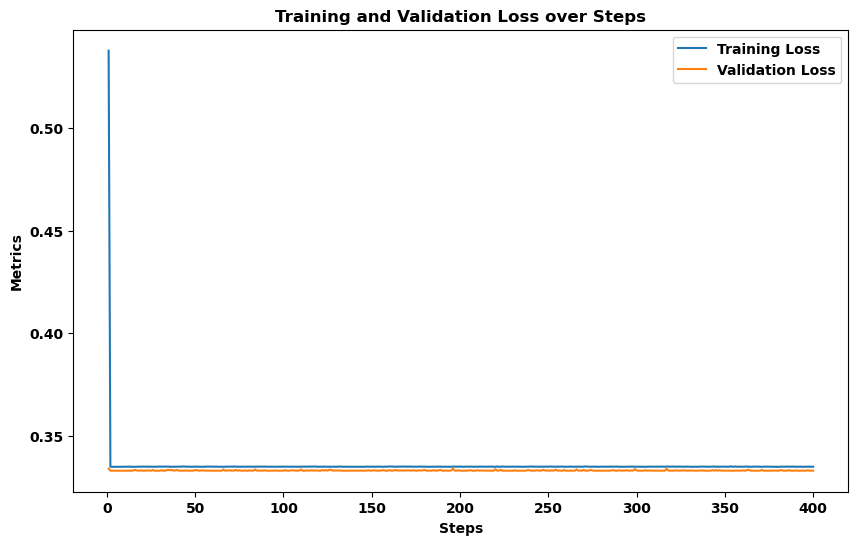

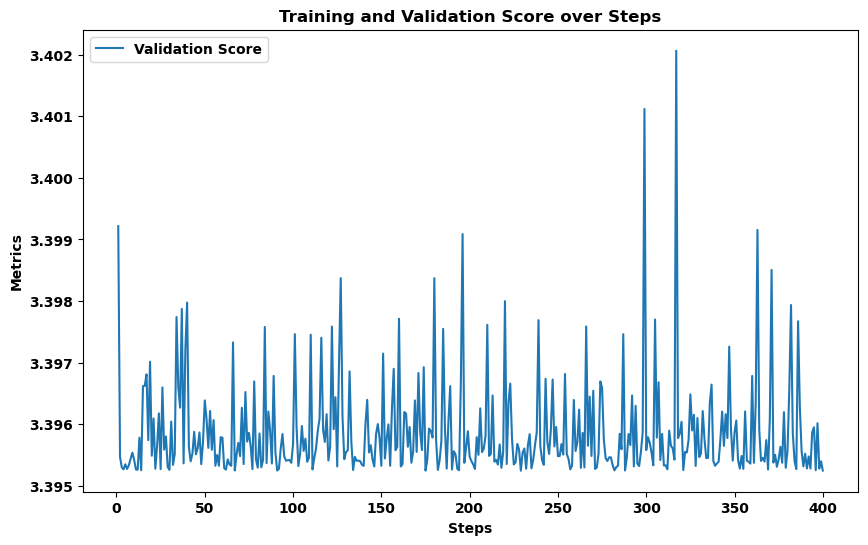

In [5]:
api = wandb.Api()

# Retrieve all runs
runs = api.runs(f"{entity}/{project_name}")

# Sort by end time (stop time) and filter only completed runs
finished_runs = [run for run in runs if run.state == "finished"]

if not finished_runs:
    print("❌ No completed run found!")
else:
    last_run = sorted(finished_runs, key=lambda r: r.created_at, reverse=True)[0]
    print("✔️ Last completed run:", last_run.id)

    run = api.run(f"{entity}/{project_name}/{last_run.id}")

history = run.history()

train_rmse = history["epoch/train-RMSE"]
val_rmse = history["epoch/val-RMSE"]
val_score = history["epoch/val-score"]

steps = range(len(history["_step"].values))

plt.figure(figsize=(10, 6))
plt.plot(steps, train_rmse, label="Training Loss")
plt.plot(steps, val_rmse, label="Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Metrics")
plt.title("Training and Validation Loss over Steps")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(steps, val_score, label="Validation Score")
plt.xlabel("Steps")
plt.ylabel("Metrics")
plt.title("Training and Validation Score over Steps")
plt.legend()
plt.show()

Predictions from group 1 (DF1 and DF3)

In [25]:
from sklearn.metrics import mean_squared_error

# Modell initialisieren und gespeicherte Gewichte laden
model = DeepCNN()
model.load_state_dict(torch.load(os.path.join(save_path, f'{config["model"]}_best.pth')))
model = model.to(device)
model.eval()  # Modell in den Evaluierungsmodus setzen

testset = CMAPSS_Dataset(
    mode = 'test',
    data_path=data_path,
    subset=subset,
    seq_length=seq_length,
    max_rul=max_rul,
    handcrafted=False
)
test_loader = DataLoader(dataset=testset, batch_size=1000, shuffle=False, num_workers=0)

all_predictions_13 = []
all_labels_13 = []

# Testdaten auswerten
with torch.no_grad():
    for data in test_loader:
        X, _, y = data
        X, y = X.to(device), y.to(device)

        predictions = model(X)

        # Verarbeite die Vorhersagen (z. B. Speichern oder Auswerten)
        pred_batch = predictions.squeeze().detach().cpu().numpy() * max_rul
        labels_batch = y.squeeze().detach().cpu().numpy() * max_rul

        # Sammle alle Vorhersagen und Labels
        all_predictions_13.extend(pred_batch)
        all_labels_13.extend(labels_batch)

# Konvertiere die Listen in NumPy-Arrays
all_predictions_13 = np.array(all_predictions_13)
all_labels_13 = np.array(all_labels_13)

rmse_13 = np.sqrt(mean_squared_error(all_labels_13, all_predictions_13))
print(f'RMSE: {rmse_13:.3f}')
score_13 = Trainer.score(torch.tensor(all_labels_13), torch.tensor(all_predictions_13))
print(f'Score: {score_13:.3f}')

# Save predictions
model_results["DCNN_13"] = {
    "predictions": all_predictions_13,
    "labels": all_labels_13,
    "rmse": rmse_13,
    "score": score_13
}

Found 200 unique motor IDs in the data set.
RMSE: 14.785
Score: 975.727


In [26]:
subset = '24'
max_rul = 125
seq_length = 30

config={
    "learning_rate": 0.0005,
    "epochs": 400,
    "model": f"DCNN_{subset}"
}

Training of group 2 (DF2 and DF4)

In [8]:
trainset = CMAPSS_Dataset(
    mode = 'train',
    data_path=data_path,
    subset=subset,
    seq_length=seq_length,
    max_rul=max_rul
)

train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size

train_subset, val_subset = random_split(trainset, [train_size, val_size])

train_loader = DataLoader(dataset=train_subset, batch_size=128, shuffle=True, num_workers=0)
val_loader = DataLoader(dataset=val_subset, batch_size=128, shuffle=False, num_workers=0)



iterations = 10


best_score_list = []
best_RMSE_list = []
for iteration in range(iterations):
    global_step = 0
    run = wandb.init(
        project=project_name,
        name=f"DCNN_{subset}-iteration_{iteration}",
        config=config,
        reinit=True   # Wichtig! Startet WandB für jede Iteration neu
    )
    print('---Iteration: {}---'.format(iteration + 1))
    model = DeepCNN()
    print('Model loaded')
    optimizer = optim.Adam(model.parameters(), lr=run.config["learning_rate"])
    epochs = run.config["epochs"]
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    trainer = Trainer(model=model,
                        model_optimizer=optimizer,
                        print_every=50,
                        epochs=epochs,
                        device=device,
                        prefix=subset,
                        handcrafted=False
                        )
    
    best_score, best_RMSE, global_step = trainer.train(train_loader, val_loader, iteration, global_step)
    best_score_list.append(best_score)
    best_RMSE_list.append(best_RMSE)
    if iteration == np.argmin(best_RMSE_list):
        torch.save(model.state_dict(), os.path.join(save_path, f'{run.config["model"]}_best.pth'))
        print(f"Best model saved at iteration {iteration + 1}.")

    run.finish()

best_score_list = np.array(best_score_list)
best_RMSE_list = np.array(best_RMSE_list)

result = np.concatenate((best_score_list, best_RMSE_list)).reshape(2, iterations)


Found 509 unique motor IDs in the data set.


---Iteration: 1---
Model loaded
cuda
Epoch: 1
test result: score: 3.410102339884884, RMSE: 0.3338399711621698
Epoch: 2
test result: score: 3.4093026579288472, RMSE: 0.33373403032702936
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration1_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration1_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.4097862707884827, RMSE: 0.33379350064687463
Epoch: 4
test result: score: 3.40989306785222, RMSE: 0.33391673539678657
Epoch: 5
test result: score: 3.4114224622255547, RMSE: 0.33405975751241285
Epoch: 6
test result: score: 3.409363286477372, RMSE: 0.33374493827338786
Epoch: 7
test result: score: 3.409490940992969, RMSE: 0.3337612911274614
Epoch: 8
test result: score: 3.409223621729901, RMSE: 0.3337371579792628
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration1_best_score.pth.tar!
Epoch: 9
test result: score: 3.410942530881734, RMSE: 0.333984761414017

epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██
epoch/train-RMSE,▃▃▄▆▆▅▆█▄▅▆█▃▅▇▆▅▄▃▅▃▆▄▂▄▂▅▄▂▆▅▅▄▃▃▅▁▄▄▁
epoch/train-loss,▅▇▄▆▄▅▅▇▆▆▅▅▂▆▅▄█▃▄▆▃▇▅▄▅▂▇▄▃▂▄▃▂▃▁▃▄▂▁▃
epoch/val-RMSE,▁▄▁▃▁▁▃▂█▃▅▁▁▁▆▁▂▅▁▁▂▅▁▁▁▂▆▁▃▁▁▁▁▂▁▁▂▂▂▃
epoch/val-loss,▃▂▁▂▂▁▁▃▂█▇▃▁▁▁▁▂▂▁▁▂▄▁▃▁▁▁▂▂▂▁▁▁▂▂▁▁▁▂▁
epoch/val-score,▂▃▂▂▁▄▄▂▃▂▃▃▁▃▆▁▄▂▅▇▆▁▃▅▂▁▂▃▄█▇▁▂▄▁▁▅▁▂▅
train/RMSE,▇▅▅▄▆▅▅▆█▄█▁▇▅▅▇▇▅▅▆▄▄▅▄▇▇▄▅▂▆▅▅▆▄▅▅▅▃▅▅
train/loss,▂▆▅▃▅▄▄▆▇█▅▄▆▃▃▄▃▆▅▅▃▆▂█▂▁▇▆▄▃▂▂▄▃▄▅▃▃▂▆
validation/RMSE,▄▂▁▁▄▃▁▂▂▁▂▂▁▁▅▂▁▁▂▅▁▅▂▁▁▁▂▂▂▂▁▁▁▃▂▁▁█▂▃
validation/RMSE_rul,▁▁▁▁▄▁▃▁▁▁▂▂▁▄▁▁▃▂▂▁▂▂▁▁▁▁▂▁▁▂█▂▃▃▁▁▁▂▁▁
validation/loss,▁█▁▁▃▁▁▃▃▁▁▁▄▁▁▁▁▂▅▂▂▁▂▁▂▂▂▂▁▂▁▁▃▁▁▃▁▂▂▁


---Iteration: 2---
Model loaded
cuda
Epoch: 1
test result: score: 3.3427641186036374, RMSE: 0.32837495770385644
Epoch: 2
test result: score: 2.3399332056259574, RMSE: 0.2450748339239123
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.2107254013575224, RMSE: 0.2304123764878669
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.1384699671643035, RMSE: 0.22488509103691656
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration2_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.150210556163455, RMSE: 0.224363027

epoch/epoch,▁▁▁▁▁▁▁▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██████
epoch/train-RMSE,█▆▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,██▇▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▇▇▆█▄▄▄▄▄▄▃▃▄▃▄▃▂▃▂▂▂▂▂▁▃▂▂▁▂▁▃▁▂▁▂▁▁▁▁
epoch/val-loss,█▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-score,█▅▅▅▅▅▄▃▃▃▄▄▄▃▃▃▄▂▃▃▂▂▂▂▂▂▂▂▁▂▂▂▁▁▃▂▁▂▂▂
train/RMSE,█▅▇▃▄▄▂▂▄▃▂▄▃▃▆▄▃▁▄▃▄▃▂▃▂▅▁▂▂▂▃▂▃▂▄▃▃▂▂▄
train/loss,█▄▅▃▄▃▃▄▂▄▂▂▅▂▂▂▃▂▁▂▃▂▁▂▃▂▁▁▁▂▂▁▁▃▂▂▃▂▁▁
validation/RMSE,█▆▇▅▄▄▃▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▂▁▁▁▁
validation/RMSE_rul,█▇▇▅▅▅▄▄▃▄▄▃▄▃▂▂▃▂▂▃▂▁▂▁▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
validation/loss,█▇▇▇▅▄▄▄▄▃▃▃▄▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁


---Iteration: 3---
Model loaded
cuda
Epoch: 1
test result: score: 3.377311769566334, RMSE: 0.33101278113214755
Epoch: 2
test result: score: 2.479765314639655, RMSE: 0.25768795497553665
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.3581950302314283, RMSE: 0.24353810758286767
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.120039563000648, RMSE: 0.22613583967258483
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration3_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.2559158906912864, RMSE: 0.234490336

epoch/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
epoch/train-RMSE,█▇▆▅▅▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▆▆▆▅▄▃▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▇▆▅▆▅▅▃▄▄▂▂▃▂▂▂▃▃▃▂▂▂▂▂▄▁▁▁▁▂▁▃▁▁▁▁▁▁▁▁
epoch/val-loss,█▄▄▄▃▃▃▃▃▃▃▂▂▃▃▂▃▂▂▂▂▁▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-score,█▅▄▃▃▃▃▃▂▃▂▂▃▂▁▂▁▁▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/RMSE,█▂▄▃▃▂▃▃▂▄▃▃▃▄▃▂▂▂▃▂▂▂▃▂▃▁▂▂▂▂▁▃▃▃▁▄▃▂▂▁
train/loss,▇▆▆▇▃▆▆█▃▄▅▄▄▆▇▅▅▄▃▄▄▃▂▆▂▇▃▃▂▄▂▃▂▂▇▃█▃▅▁
validation/RMSE,█▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/RMSE_rul,█▅▇▅▅▄▄▃▄▃▃▃▂▂▃▂▃▂▂▃▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁
validation/loss,██▇▆▆▆▅▅▅▄▅▆▃▃▄▂▃▂▂▃▂▂▂▂▂▁▁▁▂▁▂▁▁▂▁▁▁▁▁▁


---Iteration: 4---
Model loaded
cuda
Epoch: 1
test result: score: 3.376112355781612, RMSE: 0.3308328291288459
Epoch: 2
test result: score: 2.291707514907951, RMSE: 0.24108664895714638
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.203562232134051, RMSE: 0.236188802062092
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.189165735482575, RMSE: 0.22665770216662764
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration4_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.0028054527035377, RMSE: 0.2113257618618

epoch/epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇██
epoch/train-RMSE,██▇▆▆▅▅▅▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▆▄▅▄▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁
epoch/val-loss,█▇▇▇▇▇▅▅▄▄▃▃▃▂▂▂▂▃▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▂▁▁▁
epoch/val-score,█▇▅▅▃▃▂▂▂▂▂▂▂▂▂▃▁▂▂▁▂▂▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train/RMSE,█▆▇▅▇▄▄▃▄▂▃▅▂▃▄▃▂▃▂▃▄▂▁▂▅▄▃▂▄▂▄▃▂▂▂▄▄▃▂▃
train/loss,█▆▆▄▃▃▅▄▄▃▄▃▄▄▃▃▄▂▅▄▂▄▃▃▄▃▃▃▅▃▃▃▄▃▄▃▂▃▁▃
validation/RMSE,█▅▅▅▅▃▃▃▄▄▃▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁
validation/RMSE_rul,█▆▆▄▄▄▃▃▃▃▂▂▂▂▂▃▂▁▂▂▁▂▂▂▁▁▁▂▂▁▁▁▁▁▁▂▂▁▁▁
validation/loss,█▃▂▂▂▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


---Iteration: 5---
Model loaded
cuda
Epoch: 1
test result: score: 3.4095475056997855, RMSE: 0.33376642642774584
Epoch: 2
test result: score: 3.4091805804102795, RMSE: 0.33375017038002314
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration5_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration5_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.411202216065138, RMSE: 0.3340244102468035
Epoch: 4
test result: score: 3.4101879880672086, RMSE: 0.3338543719835544
Epoch: 5
test result: score: 3.4093036841394895, RMSE: 0.33378041373840006
Epoch: 6
test result: score: 3.4098150507529774, RMSE: 0.3337971615550709
Epoch: 7
test result: score: 3.410954819962271, RMSE: 0.33398676326865956
Epoch: 8
test result: score: 3.4117227444446594, RMSE: 0.33411148721678946
Epoch: 9
test result: score: 3.4115394661016296, RMSE: 0.33407921043861527
Epoch: 10
test result: score: 3.4093222942970636, RMSE: 0.3337374262318114
best_RMSE_checkpoi

epoch/epoch,▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇████
epoch/train-RMSE,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,▅▇▁▅█▁▂▄▂▁▁▂▂▁▁▄▂▅▁▃▂▁▁▂▅▁▂▁▁▁▆▂▁▁▃▁▄▄▅▁
epoch/val-loss,▂▄▂▂█▁▁▁▂▁▂▃▂▂▃▄▁▁▂▂▁▄▄▂▂▂▁▇▁▃▁▇▂▂▂▃▅▁▇▃
epoch/val-score,▁▁▇▃▂▃▁▃▂▁▂▁▃▃▁▂▃▄▂▃▁▃▅▂█▁▁▆▁▂▁▁▂▃▄▁▁▆▂▄
train/RMSE,▃▅▂▅▅▅▂▅▂▃▅▇▁▃▃▃▂▄▃▇▃▄▃▂▇▃▄▅▇▄▆▆▂▅█▂▆▆▄▄
train/loss,▄▄▂▅▄▃▃▄▆▅▅▆▅▅▅▅▂▃▅▄█▃▄▆▁▃▆▃▄▆▆▄▅▆▆▅▂▅▅▅
validation/RMSE,▄▂▁▁▂▃▂▁▆▂▂▆▁▃▁▁▂▁▁▂▁█▂▃▁▁▁▁▁▃▄▂▂▁▃▂▃▁▄▂
validation/RMSE_rul,▂▁▁▂▁▁▃▃▁▁▁▁▁▅▃▁▂▂▁▁▂▂▂▄▁▁▁▄▁▁▃▅▂▁▁█▃▆▃▆
validation/loss,▁▂▁▁▁▂▃▁▆▂▁▁▁▃▁▂▂▁▂▁▁▃▃▁▁▁█▁▂▁▃▆▃▁▃▂▂▅▇▁


---Iteration: 6---
Model loaded
cuda
Epoch: 1
test result: score: 3.395805127769337, RMSE: 0.332446593881739
Epoch: 2
test result: score: 2.728752484262138, RMSE: 0.2731174012214024
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.354500341439188, RMSE: 0.2408466053465041
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.2440919515319595, RMSE: 0.2318065745691584
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration6_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.196497533422456, RMSE: 0.228046670120455

epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇███
epoch/train-RMSE,█▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▆▅▄▄▃▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▂▁▂▂▁▁▁▂▁▂▁▁▁▁▁▁▁
epoch/val-loss,██▇▆▆▅▄▅▅▄▃▃▄▄▃▂▂▂▃▂▂▂▂▁▁▃▂▁▂▁▂▁▂▁▁▁▁▁▃▁
epoch/val-score,█▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁
train/RMSE,█▅▅▅▄▃▄▃▃▄▃▂▃▃▄▂▁▂▂▃▄▂▃▂▂▂▂▂▂▃▂▃▁▂▂▃▂▁▂▁
train/loss,█▇▅▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▃▃▂▁▂▃▂▂▂▁▃▂▁▁▂▂▂▁▂▁
validation/RMSE,█▇▆▆▅▄▄▃▄▃▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▂▁▁▁▁▁▂▂▁▁▁▁▁
validation/RMSE_rul,█▇▆▆▅▄▃▃▃▃▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▂
validation/loss,█▅▅▅▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁


---Iteration: 7---
Model loaded
cuda
Epoch: 1
test result: score: 3.4102010448674607, RMSE: 0.3338566724196079
Epoch: 2
test result: score: 3.4092168739252258, RMSE: 0.3337371478134534
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration7_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration7_best_RMSE.pth.tar!
Epoch: 3
test result: score: 3.41033203303368, RMSE: 0.33388202450074256
Epoch: 4
test result: score: 3.4099280319308996, RMSE: 0.33381221806019296
Epoch: 5
test result: score: 3.4096283174928583, RMSE: 0.33384556718022795
Epoch: 6
test result: score: 3.4104883383753295, RMSE: 0.33391321848879507
Epoch: 7
test result: score: 3.4114056856198203, RMSE: 0.33405642952626957
Epoch: 8
test result: score: 3.4093206421811684, RMSE: 0.3337360658110361
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration7_best_RMSE.pth.tar!
Epoch: 9
test result: score: 3.409506809253645, RMSE: 0.3337626681659

epoch/epoch,▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇██
epoch/train-RMSE,▄▅▃▇▅▆▆▇▄▅▅▅█▆▅▇▆▆▇▃▄▄▄▄▅▅▃▇▆▃▄▄█▂▄▂▁▅▃▅
epoch/train-loss,▃▅▄▄█▃▄▅▄▆▄▃▂▄▁▄▄▅▃▂▅▃▄▂▂▅▃▄▆▄▅▄▄▅▄▃▃▄▃▁
epoch/val-RMSE,▂▁▁▃▂▁▂▂▁▃█▄▂▂▃▃▁▁▂▂▂▃▄▄▂▁▂▁▁▆▂▁▂▄▂▁▂▂▂▁
epoch/val-loss,▃▅▁▁▁▂▅▆▂▂▁▂▂▂▂▂▁▁▄▁▁▂▅▃▁▁▁▁▂▃█▆▆▂▃▁▁▂▁▂
epoch/val-score,▅▅▃▁▆▃▆▂▂▁▂▃▃▄▆▇▄▁▁▂▁▅▁▂▁▁▁▃▁▂█▁▁▂▁▁▃▁▃▃
train/RMSE,▅▆▄▃▇▇▇█▃▆▆▁▅▆▆▆▃▅▆▃▇▅▃▄▄▇█▄▄▆▆▄▆▆▄▆▇▆██
train/loss,▃▃▄▅▂▅▅▄▆▅▃▄▁▅▅▄█▇▁▂▅▃▄▂▂▃▂▂▆▇▂▄▁▃▅▃▂▅▄▄
validation/RMSE,▁▁▅▁▄▂▂▂▁▂▂▃▃▂▁▃▂▁▅▁▁▁▁▁▂▁▁▁▂▂▄██▂▄▁▁▂▂▂
validation/RMSE_rul,▁▁▁▁▁▂▁▁▁▁▃▂█▁▁▁▁▂▃▁▂▁▁▂▁▁▁▁▁▁█▅▂▁▁▁▃▁▂▁
validation/loss,▁▃▃▂▃▂▂▁▄▂▁▂▁▁▁▅▂▂▃▁▅▂▁▃▂▄▁▂▂▅▁▂▁▅▃█▄▁▂▂


---Iteration: 8---
Model loaded
cuda
Epoch: 1
test result: score: 3.402003453604301, RMSE: 0.3336987834441897
Epoch: 2
test result: score: 2.5601809535181137, RMSE: 0.2678426557582864
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.2016316137527885, RMSE: 0.23029862693133343
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.0870237244632177, RMSE: 0.22267255338451433
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration8_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.0266547074638996, RMSE: 0.215763161

epoch/epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇████
epoch/train-RMSE,██▇▇▆▆▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▅▄▄▄▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,██▅▅▄▄▄▃▃▃▃▃▂▂▃▂▄▂▃▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val-loss,█▆▅▅▅▅▆▄▄▃▄▂▃▂▃▂▂▂▂▁▂▁▃▁▁▁▂▁▂▂▂▁▁▁▁▁▁▂▂▃
epoch/val-score,█▅▅▄▄▃▂▂▂▂▂▂▂▁▂▂▂▂▄▂▁▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁
train/RMSE,██▆▅▃▆▃▃▅▃▃▄▄▃▅▁▅▃▅▃▅▅▂▂▃▃▂▂▄▂▁▃▃▂▃▃▂▂▂▃
train/loss,▆▇▇▆▅▇▂█▅▇▅▇█▂▃▅▆▃▃▂▃▁▆▄▃▄▂▄▄▃▃▃▃▃▅▂▂▃▃▄
validation/RMSE,█▇▆▅▅▄▄▄▄▃▃▃▃▃▄▂▂▂▂▂▂▂▂▂▁▃▂▁▂▂▁▁▂▂▂▁▂▁▁▁
validation/RMSE_rul,█▇▇▆▆▅▆▅▄▄▅▄▃▃▃▃▆▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁
validation/loss,██▆▆▆▄▄▄▄▃▃▂▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▂▁▁▂▁▂▁▁▂▁▁▁▂


---Iteration: 9---
Model loaded
cuda
Epoch: 1
test result: score: 3.4018224270979958, RMSE: 0.3329743928464109
Epoch: 2
test result: score: 2.816112830026489, RMSE: 0.279878218109846
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.2384532700155737, RMSE: 0.23489288179461598
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.210601714031952, RMSE: 0.23010366956726228
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration9_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.0258127416101774, RMSE: 0.21514686811

epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇███
epoch/train-RMSE,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▇▅▅▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-loss,█▆▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▃▂▂▁▂▂▂▁▁
epoch/val-score,█▅▄▃▃▃▃▃▄▂▂▃▂▂▂▂▂▂▂▃▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁
train/RMSE,█▆▆▄▅▄▄▂▃▃▄▃▄▄▂▂▃▃▃▃▂▃▁▂▁▃▃▂▃▂▂▂▂▂▂▂▁▂▁▂
train/loss,█▇▅▄▅▃▃▂▃▃▂▃▂▅▂▂▂▃▂▂▂▂▁▁▂▂▃▃▂▁▂▃▂▁▁▂▂▁▂▁
validation/RMSE,█▇▅▅▅▄▄▅▄▃▃▃▃▂▂▂▂▂▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▂▂▁▁▁
validation/RMSE_rul,██▇▇▆▄▄▄▄▃▃▃▃▃▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▂▁▁▁
validation/loss,█▇▇▆▄▄▄▄▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▂▂▂▁


---Iteration: 10---
Model loaded
cuda
Epoch: 1
test result: score: 3.3684718836929437, RMSE: 0.33006580885891745
Epoch: 2
test result: score: 2.456007203413661, RMSE: 0.2513007009354828
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_RMSE.pth.tar!
Epoch: 3
test result: score: 2.311571145711694, RMSE: 0.2391836296638079
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_RMSE.pth.tar!
Epoch: 4
test result: score: 2.139081193824064, RMSE: 0.22724864059284167
best_score_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_score.pth.tar!
best_RMSE_checkpoints saved successfully at ./checkpoints/DCNN_24/24_iteration10_best_RMSE.pth.tar!
Epoch: 5
test result: score: 2.1356671007018435, RMSE: 0.2226

epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇███
epoch/train-RMSE,██▇▇▅▅▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁
epoch/train-loss,█▆▆▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-RMSE,█▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-loss,█▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val-score,▇▇█▅▅▅▄▄▅▃▅▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▃▂▁▁▁▁▁▁▁▂▁▂▂
train/RMSE,█▇▅▇▇▆▆▅█▅▄▄▅▄▂▄▆▄▁▄▂▅▄▆▅▄▄▂▄▃▄▄▂▁▃▄▂▆▄▃
train/loss,██▄▅▄▄▃▃▅▄▄▃▃▂▂▅▂▃▁▃▃▃▂▃▃▃▂▃▃▃▃▂▃▄▂▂▃▂▂▂
validation/RMSE,█▅▅▅▆▃▃▃▃▃▃▂▃▂▂▂▄▂▂▂▂▁▂▂▂▁▃▂▁▁▁▁▂▂▁▁▁▁▂▁
validation/RMSE_rul,██▇▆▅▄▄▆▃▄▃▅▃▄▄▂▂▃▂▂▂▃▃▂▂▂▂▁▂▂▂▁▁▂▁▁▁▁▂▂
validation/loss,█▆▄▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁


✔️ Last completed run: sd6o8n1t


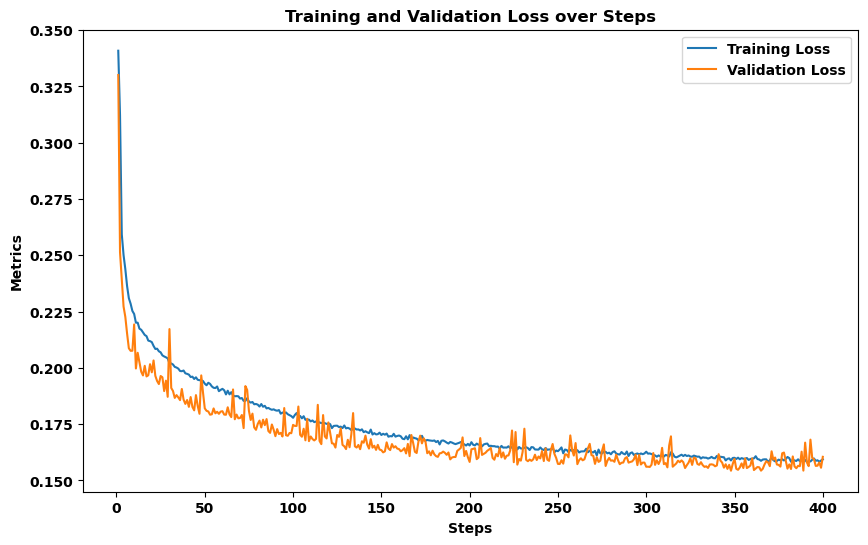

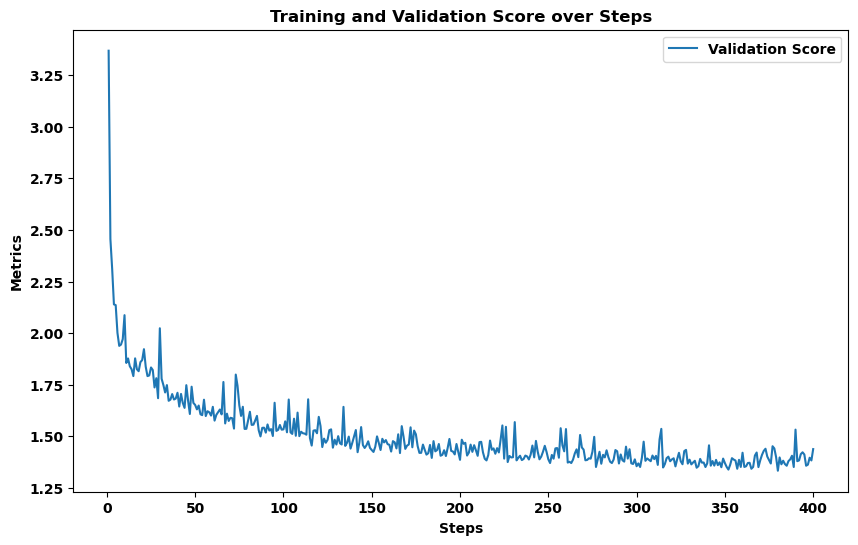

In [9]:
api = wandb.Api()

# Retrieve all runs
runs = api.runs(f"{entity}/{project_name}")

# Sort by end time (stop time) and filter only completed runs
finished_runs = [run for run in runs if run.state == "finished"]

if not finished_runs:
    print("❌ No completed run found!")
else:
    last_run = sorted(finished_runs, key=lambda r: r.created_at, reverse=True)[0]
    print("✔️ Last completed run:", last_run.id)

    run = api.run(f"{entity}/{project_name}/{last_run.id}")

history = run.history()

train_rmse = history["epoch/train-RMSE"]
val_rmse = history["epoch/val-RMSE"]
val_score = history["epoch/val-score"]

steps = range(len(history["_step"].values))

plt.figure(figsize=(10, 6))
plt.plot(steps, train_rmse, label="Training Loss")
plt.plot(steps, val_rmse, label="Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Metrics")
plt.title("Training and Validation Loss over Steps")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(steps, val_score, label="Validation Score")
plt.xlabel("Steps")
plt.ylabel("Metrics")
plt.title("Training and Validation Score over Steps")
plt.legend()
plt.show()

Predicitons of group 2 (DF2 and DF4)

In [30]:
from sklearn.metrics import mean_squared_error

# Modell initialisieren und gespeicherte Gewichte laden
model = DeepCNN()
model.load_state_dict(torch.load(os.path.join(save_path, f'{config["model"]}_best.pth')))
model = model.to(device)
model.eval()  # Modell in den Evaluierungsmodus setzen

testset = CMAPSS_Dataset(
    mode = 'test',
    data_path=data_path,
    subset=subset,
    seq_length=seq_length,
    max_rul=max_rul,
    handcrafted=False
)
test_loader = DataLoader(dataset=testset, batch_size=1000, shuffle=False, num_workers=0)

all_predictions_24 = []
all_labels_24 = []

# Testdaten auswerten
with torch.no_grad():
    for data in test_loader:
        X, _, y = data
        X, y = X.to(device), y.to(device)

        predictions = model(X)

        # Verarbeite die Vorhersagen (z. B. Speichern oder Auswerten)
        pred_batch = predictions.squeeze().detach().cpu().numpy() * max_rul
        labels_batch = y.squeeze().detach().cpu().numpy() * max_rul

        # Sammle alle Vorhersagen und Labels
        all_predictions_24.extend(pred_batch)
        all_labels_24.extend(labels_batch)

# Konvertiere die Listen in NumPy-Arrays
all_predictions_24 = np.array(all_predictions_24)
all_labels_24 = np.array(all_labels_24)

rmse_24 = np.sqrt(mean_squared_error(all_labels_24, all_predictions_24))
print(f'RMSE: {rmse_24:.3f}')

score_24 = Trainer.score(torch.tensor(all_labels_24), torch.tensor(all_predictions_24))
print(f'Score: {score_24:.3f}')

# Save predictions
model_results["DCNN_24"] = {
    "predictions": all_predictions_24,
    "labels": all_labels_24,
    "rmse": rmse_24,
    "score": score_24   
}

Found 507 unique motor IDs in the data set.
RMSE: 25.853
Score: 20717.197


In [31]:
import pandas as pd
from sklearn.metrics import f1_score, mean_squared_error

rul_score = Trainer.score

load_path = os.path.join(data_path, 'ids.txt')
arrays = {}
current_key = None

with open(load_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("id"):
            current_key = line.replace(":", "")
            arrays[current_key] = []
        elif current_key and line:
            arrays[current_key].extend(map(int, line.split()))

# Konvertieren in NumPy-Arrays
id_train_13 = np.array(arrays["id_train13"])
id_train_24 = np.array(arrays["id_train24"])
id_test_13 = np.array(arrays["id_test13"])
id_test_24 = np.array(arrays["id_test24"])

print("Array1:", id_train_13.shape)
print("Array2:", id_train_24.shape)
print("Array3:", id_test_13.shape)
print("Array4:", id_test_24.shape)


def merge_pred_id(ids, predictions):
    if len(ids) != len(predictions):
        raise ValueError("IDs und Predictions müssen die gleiche Länge haben.")

    combined = np.column_stack((ids, predictions))
    return combined

print(f'Pred13: {len(all_predictions_13)} -- IDs13: {len(id_test_13)}')
print(f'Pred24: {len(all_predictions_24)} -- IDs13: {len(id_test_24)}')

predictions13 = merge_pred_id(id_test_13, all_predictions_13)
predictions24 = merge_pred_id(id_test_24, all_predictions_24)

combined = np.vstack((predictions13, predictions24))
predicted_rul = combined[np.argsort(combined[:, 0])]
rul_true = rul = np.loadtxt(os.path.join(data_path, 'RUL_test.txt'), dtype=np.float32)
rul_true = np.minimum(rul_true, 125)

rmse = np.sqrt(mean_squared_error(rul_true, predicted_rul[:,1]))
print(f'RMSE: {rmse:.1f}')

score = rul_score(torch.tensor(rul_true), torch.tensor(predicted_rul[:,1]))
print(f'RUL-Score: {score:.0f}')

predicted_labels = predicted_rul.copy()
predicted_labels[:,1] = (predicted_rul[:,1] <= 100).astype(int)
true_labels = (rul_true <= 100).astype(int)

F1_score = f1_score(true_labels, predicted_labels[:,1])
print(f'F1 Score: {F1_score:.3f}')

df_result = pd.DataFrame(predicted_labels, columns=['engine_no', 'result'], dtype=int)
display(df_result)
model_name = 'DCNN'
# Speichern als CSV-Datei
csv_file_path = os.path.join(result_path, f'results_{model_name}.csv')
df_result.to_csv(csv_file_path, index=False)

# Save predictions
model_results["DCNN"] = {
    "predictions": predicted_rul[:,1],
    "labels": rul_true,
    "rmse": rmse,
    "score": score,
    "f1_score": F1_score
}

Array1: (200,)
Array2: (509,)
Array3: (200,)
Array4: (507,)
Pred13: 200 -- IDs13: 200
Pred24: 507 -- IDs13: 507
RMSE: 23.3
RUL-Score: 21693
F1 Score: 0.815


,engine_no,result
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
702,702,1
703,703,0
704,704,1
705,705,0


In [32]:
file_path = os.path.join(result_path, "DCNN_predictions.npz")
np.savez(file_path, model_results=model_results)